<a href="https://colab.research.google.com/github/Harish-n1/Personal-Projects/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info

<bound method DataFrame.info of             ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of             ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]>

Checking total null values count in each column

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Filling each null value with the mean of its column


In [ ]:
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Checking for duplicate values**

In [ ]:
df.duplicated().sum()

0

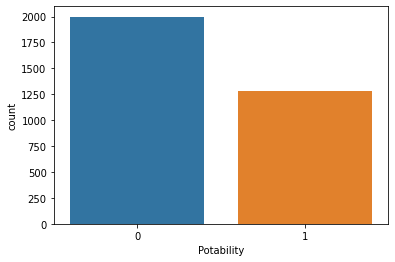

In [ ]:
sns.countplot(x=df["Potability"],data=df)

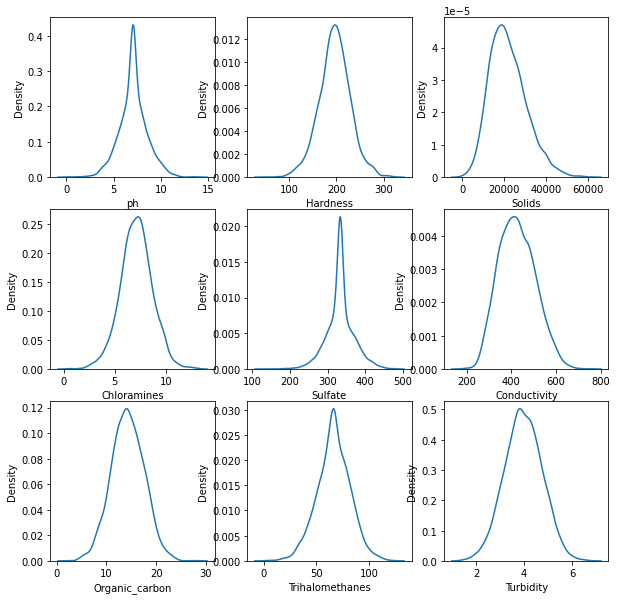

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
newdf = df.drop("Potability",axis=True)
for i,column in enumerate(newdf.columns,1):
    plt.subplot(3,3,i)
    sns.distplot(newdf[column],hist=False)


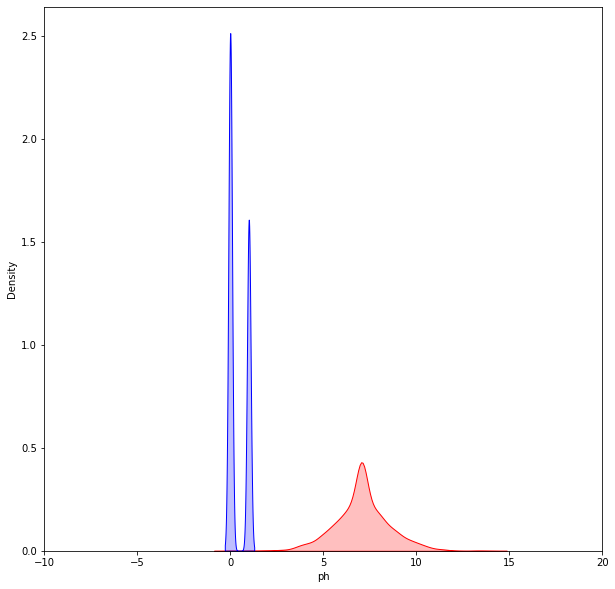

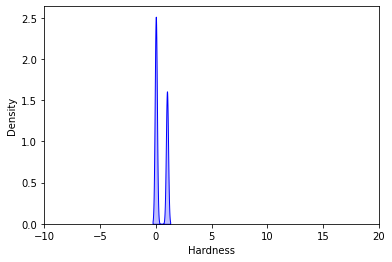

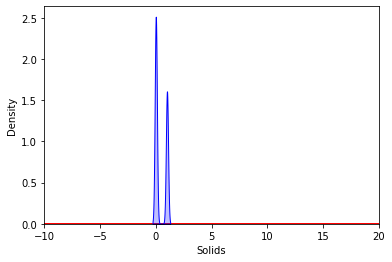

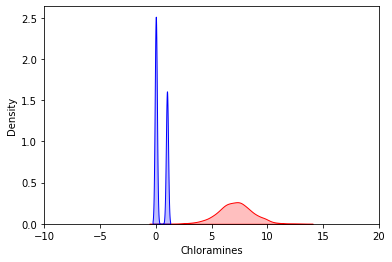

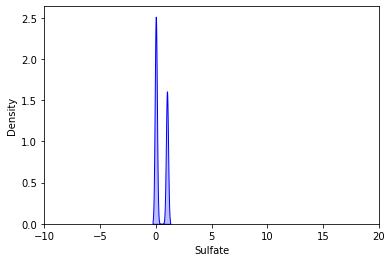

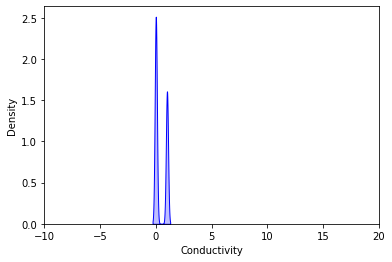

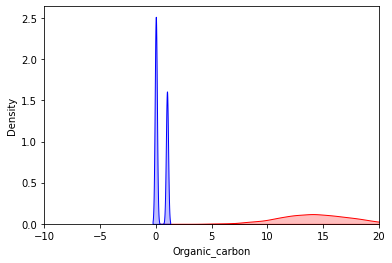

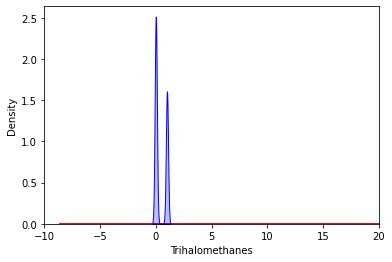

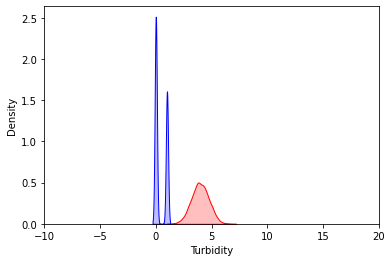

In [ ]:
plt.figure(figsize=(10,10))
for i,column in enumerate(newdf.columns,1):
    sns.kdeplot(newdf[column],color="red",shade=True)
    sns.kdeplot(df["Potability"],color="blue",shade=True)
    plt.xlim([-10,20])
    plt.show()

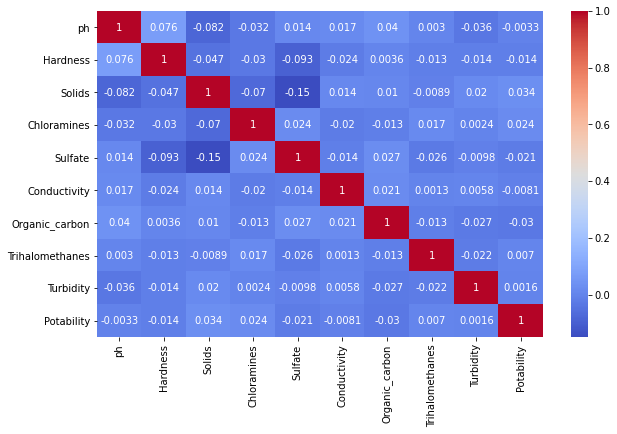

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Outlier Treatment

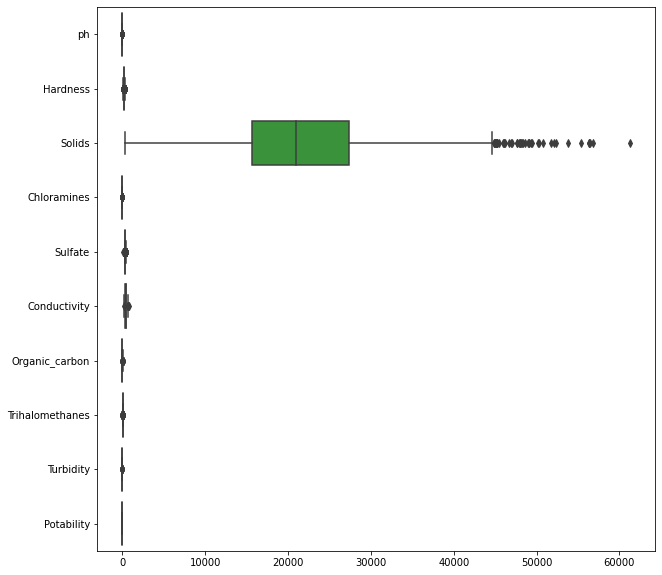

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient="h")

In [ ]:
from scipy import stats
zscore=np.abs(stats.zscore(df))
print(zscore)

[[8.46038683e-15 2.59194711e-01 1.39470871e-01 ... 1.30614943e+00
  1.28629758e+00 7.99774743e-01]
 [2.28933938e+00 2.03641367e+00 3.85986650e-01 ... 6.38479983e-01
  6.84217891e-01 7.99774743e-01]
 [6.92867789e-01 8.47664833e-01 2.40047337e-01 ... 1.50940884e-03
  1.16736546e+00 7.99774743e-01]
 ...
 [1.59125368e+00 6.26829230e-01 1.27080989e+00 ... 2.18748247e-01
  8.56006782e-01 1.25035206e+00]
 [1.32951593e+00 1.04135450e+00 1.14405809e+00 ... 7.03468419e-01
  9.50797383e-01 1.25035206e+00]
 [5.40150905e-01 3.85462310e-02 5.25811937e-01 ... 7.80223466e-01
  2.12445866e+00 1.25035206e+00]]


In [ ]:
threshold=3
print(np.where(zscore>3))

(array([  37,   61,   66,   80,   88,  104,  140,  245,  253,  263,  263,
        272,  272,  275,  275,  278,  283,  285,  287,  304,  317,  321,
        330,  335,  342,  345,  347,  351,  351,  354,  357,  365,  366,
        379,  382,  383,  385,  434,  492,  509,  531,  546,  666,  680,
        692,  703,  726,  757,  781,  783,  785,  786,  810,  810,  951,
        990, 1031, 1068, 1073, 1075, 1077, 1106, 1123, 1156, 1157, 1186,
       1186, 1290, 1292, 1303, 1316, 1343, 1353, 1360, 1366, 1384, 1412,
       1490, 1523, 1537, 1542, 1554, 1554, 1563, 1605, 1630, 1642, 1743,
       1746, 1766, 1773, 1784, 1792, 1798, 1860, 1892, 1955, 2057, 2075,
       2096, 2121, 2134, 2156, 2189, 2204, 2236, 2302, 2318, 2336, 2343,
       2350, 2353, 2370, 2376, 2401, 2424, 2446, 2447, 2470, 2497, 2602,
       2646, 2646, 2681, 2694, 2699, 2704, 2726, 2757, 2853, 2861, 2868,
       2895, 2899, 2921, 2925, 2928, 2945, 2949, 3014, 3014, 3017, 3020,
       3035, 3042, 3088, 3094, 3130, 3142, 3150, 3

In [ ]:
df_clean=df
df_clean = df_clean[(zscore<3).all(axis=1)]

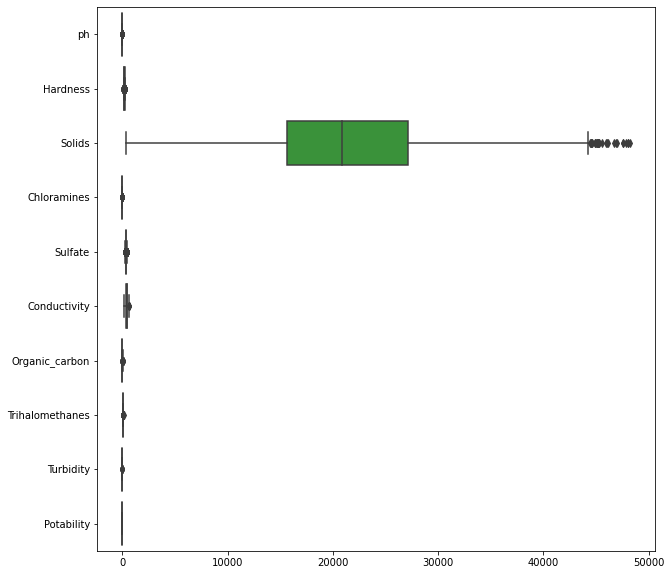

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_clean,orient="h")

In [ ]:
df.shape,df_clean.shape

((3276, 10), (3128, 10))

In [ ]:
X=df.drop(["Potability"],axis=1)
y=df["Potability"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

Normalizing and Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mscale=MinMaxScaler()
mscale.fit_transform(x_train)
mscale.transform(x_test)

array([[0.43309677, 0.41109394, 0.23731887, ..., 0.38731862, 0.55410795,
        0.38142124],
       [0.50577104, 0.67317199, 0.43920245, ..., 0.55819713, 0.41007286,
        0.5359952 ],
       [0.66091832, 0.43747643, 0.82024943, ..., 0.37355762, 0.4990904 ,
        0.34989333],
       ...,
       [0.42761385, 0.82865848, 0.34328397, ..., 0.36717943, 0.74223794,
        0.68094042],
       [0.50577104, 0.63943978, 0.25568363, ..., 0.49939759, 0.38501381,
        0.5119923 ],
       [0.54300868, 0.55105395, 0.18101919, ..., 0.6025204 , 0.50387526,
        0.42519848]])

**Train Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
keys = ['KNN','LogisticRegression','DecisionTree','Randomforest','supportvector','Gaussian']
values = [KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB()]
models = dict(zip(keys,values))
print(models)

{'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'DecisionTree': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'Randomfore

In [ ]:
for name,algo in models.items():
    model = algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = model.score(x_train,y_train)
    print(name,acc)

KNN 0.6950381679389313
LogisticRegression 0.6206106870229008
DecisionTree 1.0
Randomforest 1.0
supportvector 0.6202290076335878
Gaussian 0.6347328244274809


***Testing***

In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
test_score = clf.score(x_test,y_test)
y_pred=clf.predict(x_test)
print("RandomForestClassifier Test Score:",test_score)

RandomForestClassifier Test Score: 0.6432926829268293


Prediction Accuracy of RandomForestClassifier is 64%
